### Image Stitching

### Import Libraries

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils

### Important Functions

In [3]:
def show_image(img, title = "Default", gray = True) :
    plt.figure(1, (16, 8))
    plt.title(title)
    if gray : plt.imshow(img, cmap='gray')
    else : 
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        plt.imshow(img)
    plt.axis('off')
    plt.show()

def show_stacked_images(arr_imgs, arr_labels, stack_row = 4, stack_col = 3, gray = True) :
    plt.figure(1, (16, 8))
    for i, (label, image) in enumerate(zip(arr_labels, arr_imgs)) :
        plt.subplot(stack_row, stack_col, (i + 1))
        plt.title(label)
        
        if gray : 
            plt.imshow(image, cmap='gray')
        else : 
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            plt.imshow(image)

        plt.axis('off')
    plt.show()

### Read Images

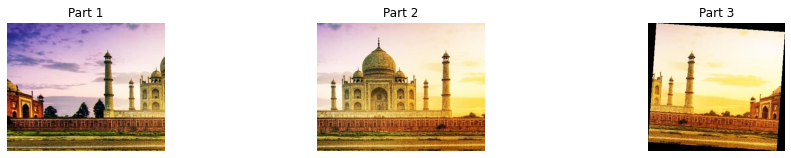

In [13]:
img_parts = []
for i in range (3) :
    path = f"1{chr(97 + i)}.jpg"
    tmp = cv2.imread(path)
    img_parts.append(tmp)

show_stacked_images(img_parts, ["Part 1", "Part 2", "Part 3"], 3, 3, gray=False)

### Imutils Library

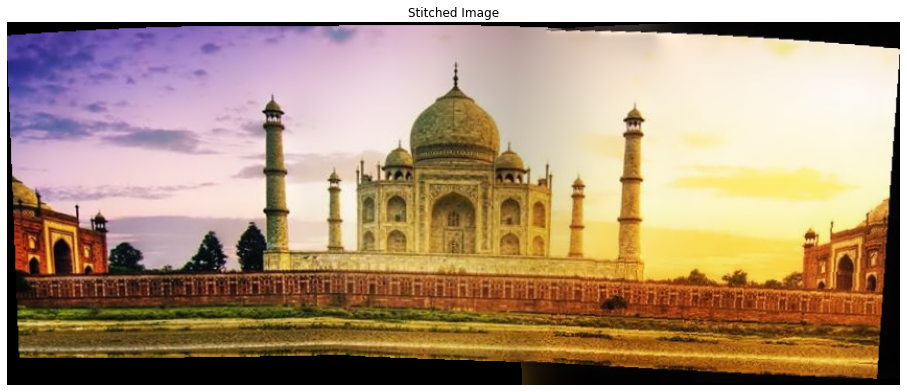

In [14]:
def stitch_image(img_parts) :
    # create stitcher
    stitcher = cv2.createStitcher() if imutils.is_cv3() else cv2.Stitcher_create()
    # stitch images together
    (status, stitched) = stitcher.stitch(img_parts)
    
    # if status is 0, then OpenCV successfully performed image stitching
    if status == 0 :
        return stitched
    else :
        return None
    
stitched = stitch_image(img_parts)
show_image(stitched, "Stitched Image", gray=False)